In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vaini to
phan thiet vn
alta floresta br
calais fr
mataura pf
jamestown sh
georgetown sh
mataura pf
new norfolk au
kruisfontein za
puerto ayora ec
aykhal ru
kattivakkam in
busselton au
albany au
ushuaia ar
busselton au
mys shmidta ru
lompoc us
hermanus za
hasaki jp
waipawa nz
lebu cl
hobart au
albany au
butaritari ki
tasiilaq gl
naze jp
ahuimanu us
kapaa us
belaya gora ru
bur gabo so
rikitea pf
puerto ayora ec
atuona pf
bluff nz
pevek ru
khonuu ru
puerto ayora ec
georgetown sh
conceicao do araguaia br
saint-philippe re
bethel us
half moon bay us
tautira pf
mar del plata ar
ushuaia ar
geraldton au
tilichiki ru
albany au
barrow us
tasiilaq gl
tomakomai jp
punta arenas cl
illoqqortoormiut gl
albany au
barentsburg sj
kapaa us
qaanaaq gl
kollumerland nl
albany au
tabas ir
kapaa us
nizhneyansk ru
codrington ag
thompson ca
puerto ayora ec
willowmore za
sitka us
honningsvag no
berlevag no
kapaa us
saldanha za
ushuaia ar
kahului us
la asuncion ve
victoria sc
kristiansund no
jamestown sh
busselto

ushuaia ar
chagda ru
huaihua cn
guerrero negro mx
pevek ru
sao joao da barra br
rio grande br
cape town za
vardo no
mataura pf
barentsburg sj
sentyabrskiy ru
jamestown sh
morgan city us
kharp ru
rikitea pf
avarua ck
tiksi ru
oussouye sn
nizhneyansk ru
mount pleasant us
punta alta ar
tumannyy ru
busselton au
punta arenas cl
broome au
atuona pf
ushuaia ar
boende cd
new norfolk au
smithers ca
paradwip in
arak ir
kaitangata nz
eldoret ke
east london za
tura ru
hithadhoo mv
rikitea pf
kasama zm
nelson bay au
lorengau pg
atuona pf
belyy yar ru
punta arenas cl
rikitea pf
puerto ayora ec
nikolskoye ru
mataura pf
rikitea pf
rikitea pf
bhanjanagar in
nikolskoye ru
stromness gb
busselton au
tual id
vaini to
albany au
port alfred za
lavrentiya ru
adiake ci
saint-louis sn
cape town za
coihaique cl
atuona pf
moa cu
ostrovnoy ru
busselton au
maxixe mz
panzhihua cn
mataura pf
luau ao
marcona pe
ulundurpettai in
puerto ayora ec
hermanus za
bintulu my
chuy uy
tiznit ma
mar del plata ar
ngorongoro tz
sao

hermanus za
provideniya ru
waingapu id
tromso no
turayf sa
pangnirtung ca
pangnirtung ca
upernavik gl
arraial do cabo br
port alfred za
mandera ke
polunochnoye ru
cabedelo br
la rioja ar
rawson ar
arraial do cabo br
rikitea pf
la ronge ca
kapaa us
mount gambier au
saleaula ws
albany au
attawapiskat ca
bengkulu id
nikolskoye ru
avarua ck
zarakes gr
kokoda pg
avarua ck
waw sd
ust-maya ru
port elizabeth za
louisbourg ca
vaini to
butaritari ki
kabalo cd
hithadhoo mv
vaini to
barrow us
litovko ru
busselton au
barrow us
khoy ir
kharovsk ru
aden ye
caravelas br
avarua ck
merauke id
sabha ly
grants us
hobart au
rani in
ugoofaaru mv
new norfolk au
hobart au
nanortalik gl
poco verde br
muisne ec
jamestown sh
makat kz
leningradskiy ru
longyearbyen sj
gubkinskiy ru
vestmanna fo
eyl so
bumba cd
new norfolk au
rundu na
colares pt
bathsheba bb
ponta do sol cv
mazamari pe
dikson ru
eirunepe br
mutoko zw
puerto ayora ec
louisbourg ca
castiglione del lago it
nikolskoye ru
ribeira grande pt
hilo us
vardo

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | phan thiet
Processing Record 3 of Set 1 | alta floresta
Processing Record 4 of Set 1 | calais
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | aykhal
Processing Record 12 of Set 1 | kattivakkam
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | waipawa
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | hobart
Processing Re

Processing Record 34 of Set 4 | te anau
Processing Record 35 of Set 4 | vila franca do campo
Processing Record 36 of Set 4 | bengkulu
Processing Record 37 of Set 4 | nantucket
Processing Record 38 of Set 4 | east london
Processing Record 39 of Set 4 | oranjemund
Processing Record 40 of Set 4 | rabo de peixe
Processing Record 41 of Set 4 | inhambane
Processing Record 42 of Set 4 | sola
Processing Record 43 of Set 4 | port hardy
Processing Record 44 of Set 4 | honiara
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | prince rupert
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | punta gorda
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | hamilton
Processing Record 1 of Set 5 | kudahuvadhoo
Processing Record 2 of Set 5 | candido mendes
Processing Record 3 of Set 5 | gorom-gorom
Processing Record 4 of Set 5 | valle del guamuez
Processing Record 5 of Set 5 | rognan
Processing Record 6 of Set 5 | antsohihy
Processing

Processing Record 21 of Set 8 | lavrentiya
Processing Record 22 of Set 8 | adiake
Processing Record 23 of Set 8 | saint-louis
Processing Record 24 of Set 8 | coihaique
Processing Record 25 of Set 8 | moa
Processing Record 26 of Set 8 | maxixe
Processing Record 27 of Set 8 | panzhihua
Processing Record 28 of Set 8 | luau
Processing Record 29 of Set 8 | marcona
City not found. Skipping...
Processing Record 30 of Set 8 | ulundurpettai
City not found. Skipping...
Processing Record 31 of Set 8 | bintulu
Processing Record 32 of Set 8 | tiznit
Processing Record 33 of Set 8 | ngorongoro
Processing Record 34 of Set 8 | polczyn-zdroj
Processing Record 35 of Set 8 | kaniama
Processing Record 36 of Set 8 | kutum
Processing Record 37 of Set 8 | ancud
Processing Record 38 of Set 8 | vostok
Processing Record 39 of Set 8 | alofi
Processing Record 40 of Set 8 | khilok
Processing Record 41 of Set 8 | luba
Processing Record 42 of Set 8 | cefalu
Processing Record 43 of Set 8 | gazni
City not found. Skippi

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.36,94,40,5.75,TO,2022-01-02 10:04:55
1,Phan Thiet,10.9333,108.1000,79.16,69,100,18.50,VN,2022-01-02 10:04:55
2,Alta Floresta,-9.8756,-56.0861,68.95,99,75,2.93,BR,2022-01-02 10:04:55
3,Calais,50.9167,1.8333,56.01,88,98,25.72,FR,2022-01-02 10:00:05
4,Mataura,-46.1927,168.8643,64.47,82,100,2.68,NZ,2022-01-02 10:04:56
5,Jamestown,42.0970,-79.2353,37.09,58,100,1.99,US,2022-01-02 10:01:21
6,Georgetown,5.4112,100.3354,87.73,62,20,1.01,MY,2022-01-02 10:04:57
7,New Norfolk,-42.7826,147.0587,58.50,70,87,1.01,AU,2022-01-02 10:04:57
8,Kruisfontein,-34.0033,24.7314,75.88,46,75,13.20,ZA,2022-01-02 10:04:57
9,Puerto Ayora,-0.7393,-90.3518,68.65,88,56,6.76,EC,2022-01-02 10:04:57


In [33]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-01-02 10:04:55,-21.2000,-175.2000,75.36,94,40,5.75
1,Phan Thiet,VN,2022-01-02 10:04:55,10.9333,108.1000,79.16,69,100,18.50
2,Alta Floresta,BR,2022-01-02 10:04:55,-9.8756,-56.0861,68.95,99,75,2.93
3,Calais,FR,2022-01-02 10:00:05,50.9167,1.8333,56.01,88,98,25.72
4,Mataura,NZ,2022-01-02 10:04:56,-46.1927,168.8643,64.47,82,100,2.68
...,...,...,...,...,...,...,...,...,...
545,Castiglione Del Lago,IT,2022-01-02 10:19:45,43.1271,12.0453,51.55,92,79,3.67
546,Kralendijk,BQ,2022-01-02 10:20:05,12.1500,-68.2667,76.98,83,20,18.41
547,Fremont,US,2022-01-02 10:19:49,37.5483,-121.9886,47.01,61,1,0.00
548,Wasilla,US,2022-01-02 10:22:21,61.5814,-149.4394,8.02,86,87,0.47


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [39]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1641118952.7531078

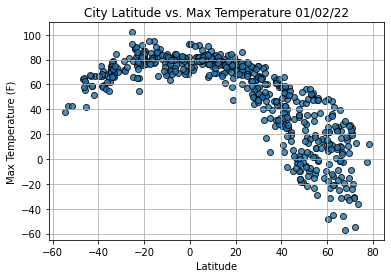

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

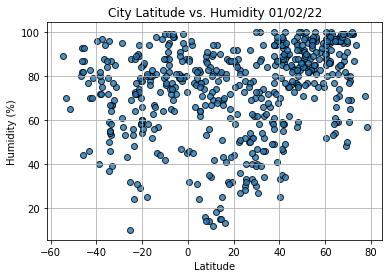

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

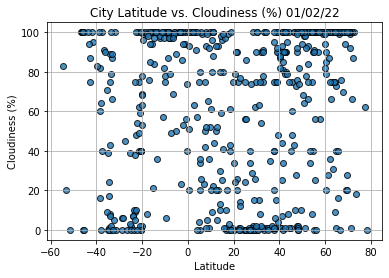

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

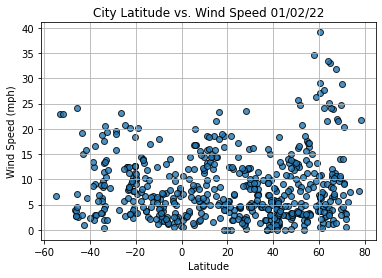

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [60]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [61]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

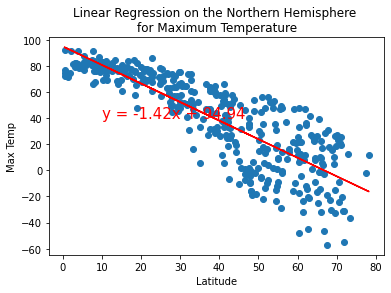

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

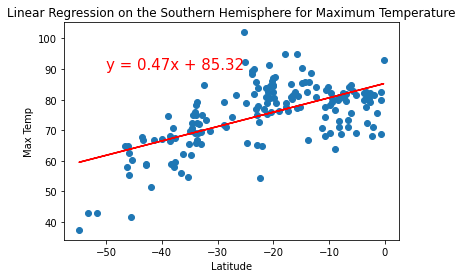

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

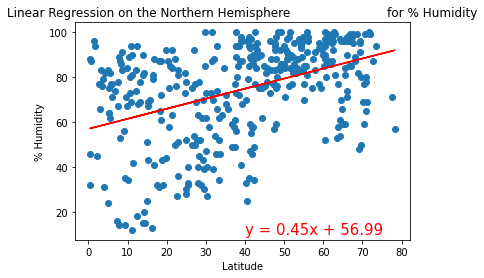

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

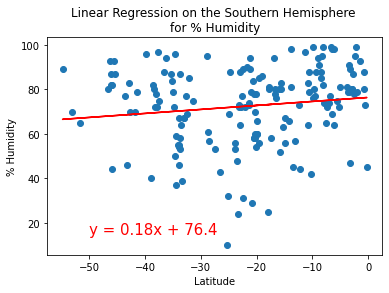

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

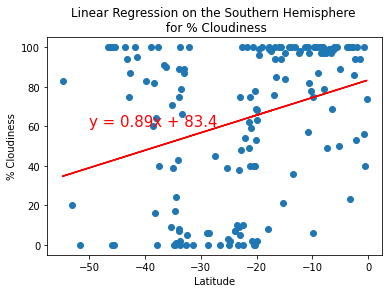

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

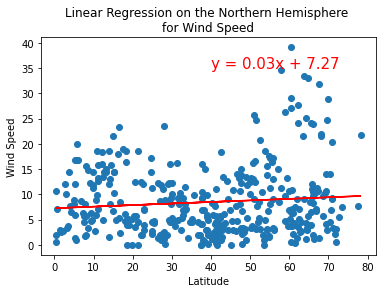

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

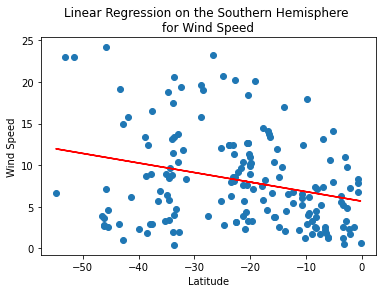

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))